In [1]:
from process_CSL import * 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Reading in the labelled annotations

In [7]:
split_txt_path = "../../CSL-Daily/sentence_label/split_1.txt"
split_df = pd.read_csv(split_txt_path, delimiter='|')  # Adjust 'delimiter' as needed

In [8]:
## Combined labels before processing
combined_labels = read_CSL_annotations("../../CSL-Daily/sentence_label/csl2020ct_v2.pkl")
combined_labels

{'info': [{'name': 'S000000_P0000_T00',
   'length': 52,
   'label_gloss': ['你们', '好'],
   'label_char': ['你', '们', '好', '！'],
   'label_word': ['你们', '好', '！'],
   'label_postag': ['r', 'a', 'w'],
   'signer': 0,
   'time': 0},
  {'name': 'S000000_P0004_T00',
   'length': 47,
   'label_gloss': ['你们', '好'],
   'label_char': ['你', '们', '好', '！'],
   'label_word': ['你们', '好', '！'],
   'label_postag': ['r', 'a', 'w'],
   'signer': 4,
   'time': 0},
  {'name': 'S000000_P0008_T00',
   'length': 58,
   'label_gloss': ['你们', '好'],
   'label_char': ['你', '们', '好', '！'],
   'label_word': ['你们', '好', '！'],
   'label_postag': ['r', 'a', 'w'],
   'signer': 8,
   'time': 0},
  {'name': 'S000001_P0000_T00',
   'length': 37,
   'label_gloss': ['对不起'],
   'label_char': ['对', '不', '起', '！'],
   'label_word': ['对不起', '！'],
   'label_postag': ['v', 'w'],
   'signer': 0,
   'time': 0},
  {'name': 'S000001_P0004_T00',
   'length': 33,
   'label_gloss': ['对不起'],
   'label_char': ['对', '不', '起', '！'],
   'la

## Finding utility to double check the labels 

In [9]:
def find_entry_by_name(data, name):
    # Iterate through the list of dictionaries in 'info'
    for entry in data['info']:
        if entry['name'] == name:
            return entry
    return None

# Example usage
specified_name = 'S000020_P0008_T00'
result = find_entry_by_name(combined_labels, specified_name)

if result:
    print("Entry found:")
    print(result)
else:
    print("Entry not found.")

Entry found:
{'name': 'S000020_P0008_T00', 'length': 90, 'label_gloss': ['他', '今天', '年龄', '4'], 'label_char': ['他', '今', '年', '四', '岁', '。'], 'label_word': ['他', '今年', '四', '岁', '。'], 'label_postag': ['r', 't', 'm', 'q', 'w'], 'signer': 8, 'time': 0}


In [5]:
## Reading in the labelled annotations
train_labels = read_CSL_annotations("../../CSL-Daily/sentence_label/processed/labels_train.pkl") 
dev_labels = read_CSL_annotations("../../CSL-Daily/sentence_label/processed/labels_dev.pkl")
test_labels = read_CSL_annotations("../../CSL-Daily/sentence_label/processed/labels_test.pkl")

### Calculating and understanding the distribution of the training set

In [11]:
train_labels

{'info': [{'name': 'S000000_P0000_T00', 'translation': '你们好！', 'length': 52},
  {'name': 'S000000_P0004_T00', 'translation': '你们好！', 'length': 47},
  {'name': 'S000000_P0008_T00', 'translation': '你们好！', 'length': 58},
  {'name': 'S000001_P0000_T00', 'translation': '对不起！', 'length': 37},
  {'name': 'S000001_P0004_T00', 'translation': '对不起！', 'length': 33},
  {'name': 'S000001_P0008_T00', 'translation': '对不起！', 'length': 45},
  {'name': 'S000002_P0000_T00', 'translation': '没关系！', 'length': 29},
  {'name': 'S000002_P0004_T00', 'translation': '没关系！', 'length': 35},
  {'name': 'S000002_P0008_T00', 'translation': '没关系！', 'length': 49},
  {'name': 'S000003_P0000_T00', 'translation': '谢谢！', 'length': 30},
  {'name': 'S000003_P0004_T00', 'translation': '谢谢！', 'length': 32},
  {'name': 'S000003_P0008_T00', 'translation': '谢谢！', 'length': 35},
  {'name': 'S000004_P0000_T00', 'translation': '不客气！', 'length': 51},
  {'name': 'S000004_P0004_T00', 'translation': '不客气！', 'length': 41},
  {'name': 'S00

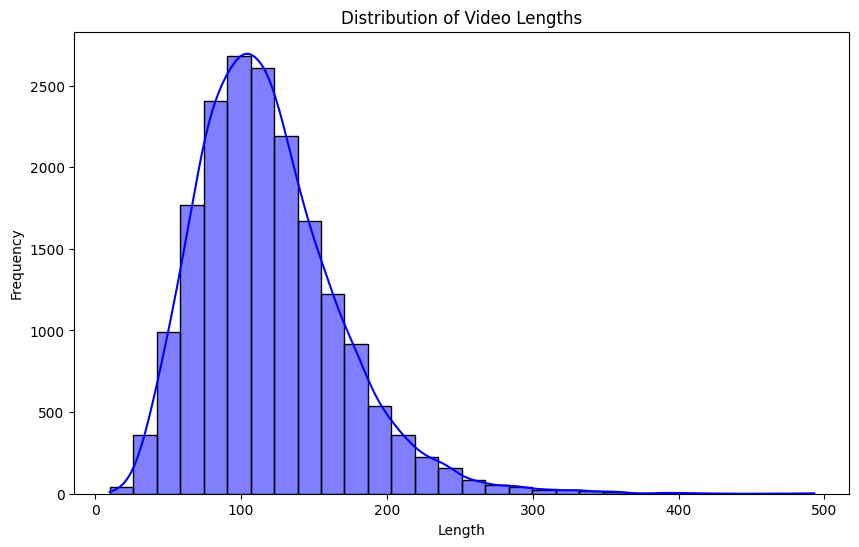

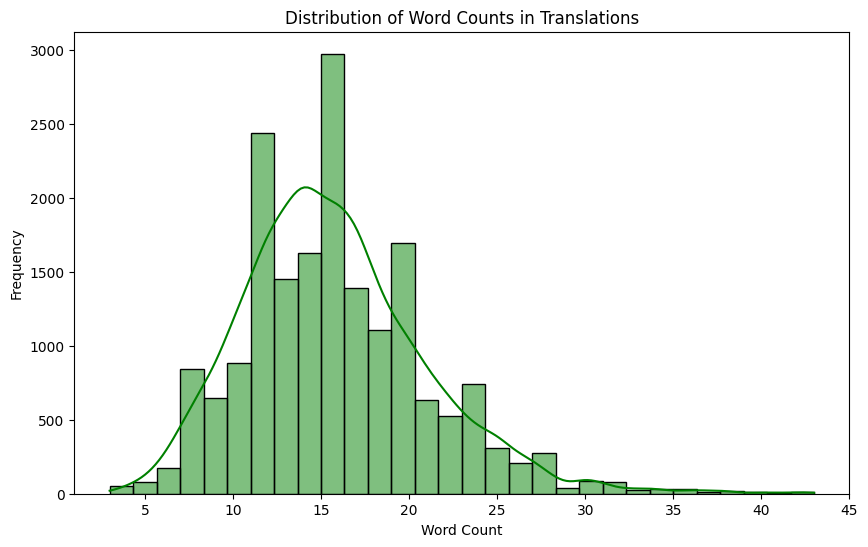

(count    18401.000000
 mean       118.761372
 std         48.784183
 min         10.000000
 25%         84.000000
 50%        112.000000
 75%        145.000000
 max        493.000000
 Name: length, dtype: float64,
 count    18401.000000
 mean        15.733819
 std          5.285369
 min          3.000000
 25%         12.000000
 50%         15.000000
 75%         19.000000
 max         43.000000
 Name: word_count, dtype: float64)

In [12]:
# Convert data dictionary into a pandas DataFrame
df = pd.DataFrame(train_labels['info'])

# Add a word count column for translations
df['word_count'] = df['translation'].apply(lambda x: len(x))

# Plotting the distribution of lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Video Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='green')
plt.title('Distribution of Word Counts in Translations')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Display basic statistics of the dataset
length_stats = df['length'].describe()
word_count_stats = df['word_count'].describe()

length_stats, word_count_stats

In [13]:

# Creating a set to store unique translations and avoid repetitions
unique_train = set(item['translation'] for item in train_labels['info'])
# Converting the set back to a list
unique_train_list = list(unique_train)

In [15]:
## Making sure that all of train_labels are also in combined_labels
def find_entry_by_name(data, name):
    # Iterate through the list of dictionaries in 'info'
    for entry in data['info']:
        if entry['name'] == name:
            return entry
    return None
# Extracting info from the test labels and combined labels
train_info = train_labels['info']
combined_info = combined_labels['info']

# Creating a dictionary from combined labels for quick lookup by name
combined_dict = {entry['name']: entry for entry in combined_info}

# Validating entries from train_labels against combined_labels
mismatches = []
for train_entry in train_info:
    name = train_entry['name']
    length = train_entry['length']
    label_word = train_entry['translation']  # Assuming the translation serves as label_word here
    
    # Retrieve corresponding entry from combined_dict if exists
    combined_entry = find_entry_by_name(combined_labels, name)
    
    if combined_entry:
        # Check if length and label_word match
        combined_length = combined_entry['length']
        combined_label_word = ''.join(combined_entry['label_word'])  # Joining words
        
        if length != combined_length or label_word != combined_label_word:
            mismatches.append({
                'name': name,
                'test_length': length,
                'combined_length': combined_length,
                'test_label_word': label_word,
                'combined_label_word': combined_label_word
            })
    else:
        print(f"Entry with name {name} not found in combined labels.")

# Output the mismatches if there are any
if mismatches:
    print("Mismatches found between train_labels and combined_labels:")
    for mismatch in mismatches:
        print(mismatch)
else:
    print("All entries match between train_labels and combined_labels.")

All entries match between train_labels and combined_labels.


### Calculating and understanding the distribution of the development set 

In [6]:
dev_labels

{'info': [{'name': 'S000020_P0000_T00', 'translation': '他今年四岁。', 'length': 54},
  {'name': 'S000020_P0008_T00', 'translation': '他今年四岁。', 'length': 90},
  {'name': 'S000040_P0000_T00', 'translation': '今天星期几？', 'length': 41},
  {'name': 'S000040_P0004_T00', 'translation': '今天星期几？', 'length': 42},
  {'name': 'S000054_P0000_T00', 'translation': '今天我想吃面条。', 'length': 56},
  {'name': 'S000153_P0004_T00', 'translation': '你和小张什么时候认识的？', 'length': 55},
  {'name': 'S000153_P0008_T00', 'translation': '你和小张什么时候认识的？', 'length': 109},
  {'name': 'S000185_P0000_T00', 'translation': '我要去超市买椅子，你去吗？', 'length': 91},
  {'name': 'S000195_P0000_T00', 'translation': '他们下午要做什么？', 'length': 49},
  {'name': 'S000195_P0008_T00', 'translation': '他们下午要做什么？', 'length': 84},
  {'name': 'S000196_P0000_T00', 'translation': '他们想什么时候去买椅子？', 'length': 79},
  {'name': 'S000196_P0004_T00', 'translation': '他们想什么时候去买椅子？', 'length': 90},
  {'name': 'S000201_P0004_T00', 'translation': '我每天六点起床。', 'length': 134},
  {'name': 'S

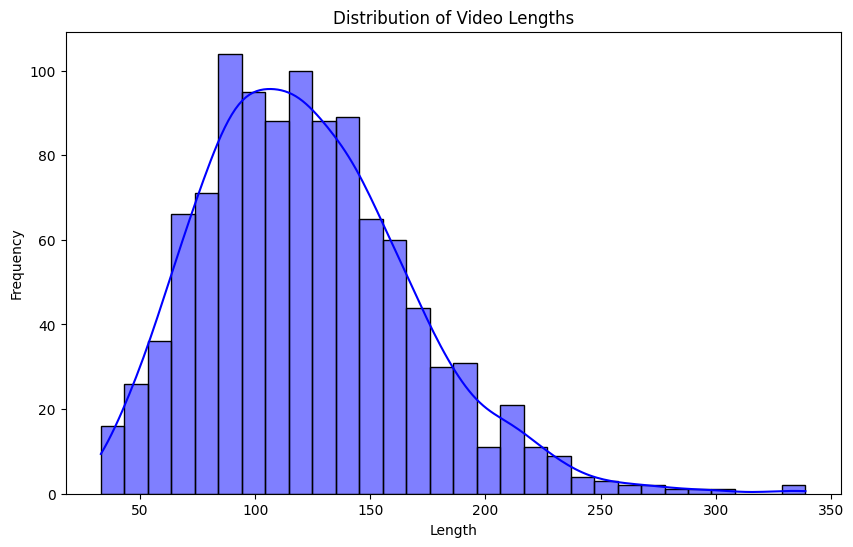

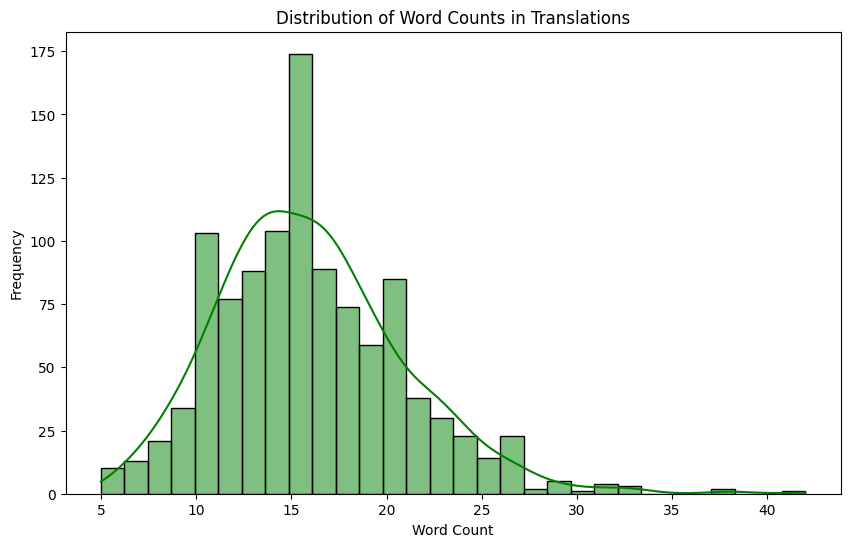

(count    1077.000000
 mean      122.498607
 std        45.531937
 min        33.000000
 25%        89.000000
 50%       117.000000
 75%       149.000000
 max       339.000000
 Name: length, dtype: float64,
 count    1077.000000
 mean       16.021356
 std         4.912857
 min         5.000000
 25%        13.000000
 50%        16.000000
 75%        19.000000
 max        42.000000
 Name: word_count, dtype: float64)

In [17]:
# Convert data dictionary into a pandas DataFrame
df = pd.DataFrame(dev_labels['info'])

# Add a word count column for translations
df['word_count'] = df['translation'].apply(lambda x: len(x))

# Plotting the distribution of lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Video Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='green')
plt.title('Distribution of Word Counts in Translations')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Display basic statistics of the dataset
length_stats = df['length'].describe()
word_count_stats = df['word_count'].describe()

length_stats, word_count_stats

In [18]:
## Making sure that all of dev_labels are also in combined_labels
def find_entry_by_name(data, name):
    # Iterate through the list of dictionaries in 'info'
    for entry in data['info']:
        if entry['name'] == name:
            return entry
    return None
# Extracting info from the test labels and combined labels
dev_info = dev_labels['info']
combined_info = combined_labels['info']

# Creating a dictionary from combined labels for quick lookup by name
combined_dict = {entry['name']: entry for entry in combined_info}

# Validating entries from train_labels against combined_labels
mismatches = []
for dev_entry in dev_info:
    name = dev_entry['name']
    length =dev_entry['length']
    label_word = dev_entry['translation']  # Assuming the translation serves as label_word here
    
    # Retrieve corresponding entry from combined_dict if exists
    combined_entry = find_entry_by_name(combined_labels, name)
    
    if combined_entry:
        # Check if length and label_word match
        combined_length = combined_entry['length']
        combined_label_word = ''.join(combined_entry['label_word'])  # Joining words
        
        if length != combined_length or label_word != combined_label_word:
            mismatches.append({
                'name': name,
                'test_length': length,
                'combined_length': combined_length,
                'test_label_word': label_word,
                'combined_label_word': combined_label_word
            })
    else:
        print(f"Entry with name {name} not found in combined labels.")

# Output the mismatches if there are any
if mismatches:
    print("Mismatches found between train_labels and combined_labels:")
    for mismatch in mismatches:
        print(mismatch)
else:
    print("All entries match between dev_labels and combined_labels.")

All entries match between dev_labels and combined_labels.


## Checking for overlap between the training list and development list 

In [19]:

# Creating a set to store unique translations and avoid repetitions
unique_dev= set(item['translation'] for item in dev_labels['info'])
# Converting the set back to a list
unique_dev_list = list(unique_dev)
# Finding common elements and exclusive elements between the two lists
common_translations = set(unique_dev_list).intersection(set(unique_train_list))
exclusive_to_dev = set(unique_dev_list).difference(set(unique_train_list))
exclusive_to_train = set(unique_train_list).difference(set(unique_dev_list))

# Creating dictionaries to store the lists and their lengths
results = {
    "common_translations": {
        "elements": list(common_translations),
        "count": len(common_translations)
    },
    "exclusive_to_dev": {
        "elements": list(exclusive_to_dev),
        "count": len(exclusive_to_dev)
    },
    "exclusive_to_train": {
        "elements": list(exclusive_to_train),
        "count": len(exclusive_to_train)
    }
}
print("Common translations: ", results['common_translations']['count'])
print("Translations exclusive to dev: ", results['exclusive_to_dev']['count'])
print("Translations exlusive to train: ", results['exclusive_to_train']['count'])

Common translations:  1
Translations exclusive to dev:  796
Translations exlusive to train:  6580


### Calculating and understanding the distribution of the test set 

In [20]:
test_labels

{'info': [{'name': 'S000020_P0004_T00', 'translation': '他今年四岁。', 'length': 52},
  {'name': 'S000040_P0008_T00', 'translation': '今天星期几？', 'length': 66},
  {'name': 'S000054_P0008_T00', 'translation': '今天我想吃面条。', 'length': 93},
  {'name': 'S000153_P0000_T00', 'translation': '你和小张什么时候认识的？', 'length': 76},
  {'name': 'S000185_P0004_T00', 'translation': '我要去超市买椅子，你去吗？', 'length': 108},
  {'name': 'S000185_P0008_T00', 'translation': '我要去超市买椅子，你去吗？', 'length': 161},
  {'name': 'S000195_P0004_T00', 'translation': '他们下午要做什么？', 'length': 51},
  {'name': 'S000196_P0008_T00', 'translation': '他们想什么时候去买椅子？', 'length': 124},
  {'name': 'S000201_P0000_T00', 'translation': '我每天六点起床。', 'length': 79},
  {'name': 'S000213_P0004_T00', 'translation': '他每天回来都很累。', 'length': 71},
  {'name': 'S000213_P0008_T00', 'translation': '他每天回来都很累。', 'length': 115},
  {'name': 'S000218_P0004_T00', 'translation': '这块手表是你的吗？', 'length': 31},
  {'name': 'S000218_P0008_T00', 'translation': '这块手表是你的吗？', 'length': 60},
  {'nam

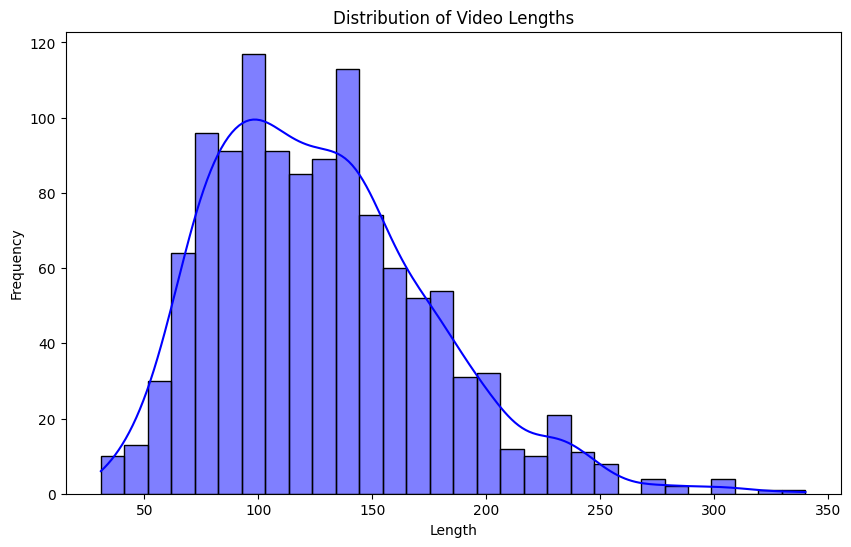

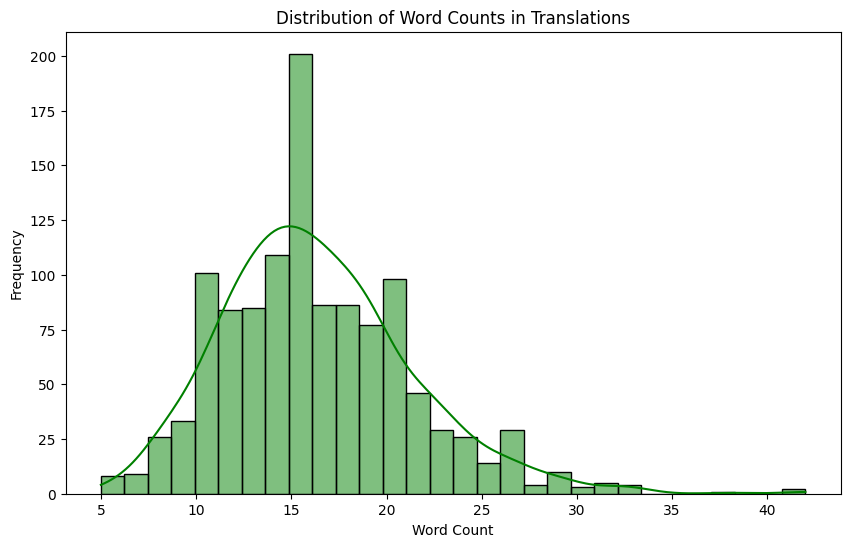

(count    1176.000000
 mean      127.761905
 std        48.256207
 min        31.000000
 25%        91.000000
 50%       122.000000
 75%       156.000000
 max       340.000000
 Name: length, dtype: float64,
 count    1176.000000
 mean       16.359694
 std         5.008491
 min         5.000000
 25%        13.000000
 50%        16.000000
 75%        19.000000
 max        42.000000
 Name: word_count, dtype: float64)

In [21]:
# Convert data dictionary into a pandas DataFrame
df = pd.DataFrame(test_labels['info'])

# Add a word count column for translations
df['word_count'] = df['translation'].apply(lambda x: len(x))

# Plotting the distribution of lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Video Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='green')
plt.title('Distribution of Word Counts in Translations')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Display basic statistics of the dataset
length_stats = df['length'].describe()
word_count_stats = df['word_count'].describe()

length_stats, word_count_stats

In [22]:
## Making sure that all of dev_labels are also in combined_labels
def find_entry_by_name(data, name):
    # Iterate through the list of dictionaries in 'info'
    for entry in data['info']:
        if entry['name'] == name:
            return entry
    return None
# Extracting info from the test labels and combined labels
test_info = test_labels['info']
combined_info = combined_labels['info']

# Creating a dictionary from combined labels for quick lookup by name
combined_dict = {entry['name']: entry for entry in combined_info}

# Validating entries from train_labels against combined_labels
mismatches = []
for test_entry in test_info:
    name = test_entry['name']
    length =test_entry['length']
    label_word = test_entry['translation']  # Assuming the translation serves as label_word here
    
    # Retrieve corresponding entry from combined_dict if exists
    combined_entry = find_entry_by_name(combined_labels, name)
    
    if combined_entry:
        # Check if length and label_word match
        combined_length = combined_entry['length']
        combined_label_word = ''.join(combined_entry['label_word'])  # Joining words
        
        if length != combined_length or label_word != combined_label_word:
            mismatches.append({
                'name': name,
                'test_length': length,
                'combined_length': combined_length,
                'test_label_word': label_word,
                'combined_label_word': combined_label_word
            })
    else:
        print(f"Entry with name {name} not found in combined labels.")

# Output the mismatches if there are any
if mismatches:
    print("Mismatches found between test_labels and combined_labels:")
    for mismatch in mismatches:
        print(mismatch)
else:
    print("All entries match between test_labels and combined_labels.")

All entries match between test_labels and combined_labels.


## Checking for overlap between test set and training set

In [23]:

# Creating a set to store unique translations and avoid repetitionss
unique_test= set(item['translation'] for item in test_labels['info'])
# Converting the set back to a list
unique_test_list = list(unique_test)
# Finding common elements and exclusive elements between the two lists
common_translations = set(unique_test_list).intersection(set(unique_train_list))
exclusive_to_test = set(unique_test_list).difference(set(unique_train_list))
exclusive_to_train = set(unique_train_list).difference(set(unique_test_list))

# Creating dictionaries to store the lists and their lengths
results = {
    "common_translations": {
        "elements": list(common_translations),
        "count": len(common_translations)
    },
    "exclusive_to_dev": {
        "elements": list(exclusive_to_test),
        "count": len(exclusive_to_test)
    },
    "exclusive_to_train": {
        "elements": list(exclusive_to_train),
        "count": len(exclusive_to_train)
    }
}
print("Common translations: ", results['common_translations']['count'])
print("Translations exclusive to dev: ", results['exclusive_to_dev']['count'])
print("Translations exlusive to train: ", results['exclusive_to_train']['count'])

Common translations:  2
Translations exclusive to dev:  796
Translations exlusive to train:  6579


## Check at token level 

In [1]:
## Bring in MBart tokenizer 
from transformers import MBart50Tokenizer

tokenizer = MBart50Tokenizer.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")


/opt/homebrew/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## Tokenise set translations

In [53]:
def tokenize_dataset(data, tokenizer):
    # Create a copy of the data to avoid modifying the original
    tokenized_data = data.copy()
    token_set = set()
    # Tokenize each translation in the data
    for entry in tokenized_data['info']:
        # Tokenize the translation
        tokenized_translation = tokenizer.encode(entry['translation'], return_tensors='pt', )
        
        # Update the entry with the tokenized translation
        entry['tokenized_translation'] = tokenized_translation[0]
        token_set.update([token for token in tokenized_translation[0].tolist()])
    return tokenized_data, token_set

#### Tokenize all the dataset translations

In [54]:
tokenized_train, train_tokens = tokenize_dataset(train_labels, tokenizer)
tokenized_dev, dev_tokens = tokenize_dataset(dev_labels, tokenizer)
tokenized_test, test_tokens = tokenize_dataset(test_labels, tokenizer)
print(f"Train tokens: {len(train_tokens)}")
print(f"Dev tokens: {len(dev_tokens)}")
print(f"Test tokens: {len(test_tokens)}")

Train tokens: 6008
Dev tokens: 2655
Test tokens: 2662


In [55]:
train_tokens

{131073,
 2,
 4,
 6,
 32777,
 12,
 196624,
 196629,
 30,
 32799,
 32,
 37,
 38,
 43,
 32814,
 163886,
 163890,
 52,
 65589,
 63,
 65600,
 229442,
 98373,
 229446,
 196679,
 98377,
 65620,
 98390,
 98391,
 32870,
 98407,
 32890,
 196738,
 98447,
 98454,
 155,
 32923,
 65698,
 32931,
 65701,
 98472,
 196784,
 32946,
 98502,
 65749,
 213,
 65751,
 32981,
 65752,
 98528,
 164064,
 32999,
 65767,
 33011,
 164097,
 264,
 98568,
 131343,
 196881,
 274,
 33048,
 98593,
 65825,
 304,
 98630,
 98632,
 33110,
 33114,
 131419,
 98653,
 354,
 363,
 33151,
 196992,
 397,
 164243,
 229788,
 65953,
 418,
 197025,
 33192,
 65965,
 33206,
 65992,
 465,
 98771,
 470,
 98776,
 229853,
 229858,
 33253,
 229861,
 487,
 66023,
 98794,
 197104,
 66048,
 514,
 164358,
 131597,
 197133,
 33295,
 98832,
 197136,
 197140,
 98839,
 164377,
 164384,
 98856,
 98859,
 66096,
 562,
 571,
 573,
 575,
 164418,
 66121,
 33370,
 197226,
 98928,
 630,
 631,
 197238,
 633,
 635,
 33406,
 33440,
 66219,
 684,
 683,
 98996,
 

In [56]:
dev_tokens


{2,
 4,
 6,
 32777,
 16394,
 139275,
 8204,
 196624,
 172049,
 40978,
 16400,
 8212,
 16405,
 90132,
 16408,
 106521,
 81945,
 57372,
 30,
 32799,
 32,
 24608,
 40990,
 37,
 147493,
 38,
 43,
 32814,
 163886,
 163890,
 52,
 172093,
 63,
 65600,
 41029,
 98373,
 8261,
 196679,
 98377,
 245835,
 147535,
 8277,
 98390,
 41051,
 16477,
 82019,
 32870,
 98407,
 147558,
 172138,
 155755,
 188529,
 8312,
 32890,
 8315,
 41084,
 8320,
 41093,
 106633,
 49293,
 57486,
 98447,
 98454,
 32923,
 147613,
 24741,
 139432,
 114860,
 32946,
 24754,
 8375,
 16570,
 8393,
 24781,
 172240,
 213,
 16598,
 32981,
 98528,
 57573,
 155878,
 32999,
 65767,
 237806,
 180463,
 180466,
 33011,
 114930,
 237810,
 237815,
 8442,
 82173,
 106753,
 16643,
 57605,
 264,
 131343,
 274,
 41247,
 8481,
 221478,
 8488,
 155948,
 90414,
 90416,
 8502,
 24888,
 49471,
 16704,
 8513,
 41284,
 98630,
 98632,
 33110,
 82264,
 155993,
 8539,
 24925,
 98653,
 354,
 8550,
 82283,
 49519,
 57718,
 90487,
 24959,
 33151,
 8585,
 8

In [57]:
exclusive_tokens_dev = dev_tokens.difference(train_tokens)
exclusive_tokens_train = train_tokens.difference(dev_tokens)
common_translations = dev_tokens.intersection(train_tokens)
print(f"When comparing train and dev tokens, there are {len(common_translations)} common tokens.")
print(f"When comparing train and dev tokens, there are {len(exclusive_tokens_train)} exclusive to train and {len(exclusive_tokens_dev)} exclusive to dev.")

When comparing train and dev tokens, there are 2490 common tokens.
When comparing train and dev tokens, there are 3518 exclusive to train and 165 exclusive to dev.


In [58]:
exclusive_tokens_test = test_tokens.difference(train_tokens)
exclusive_tokens_train = train_tokens.difference(test_tokens)
common_translations = test_tokens.intersection(train_tokens)
print(f"When comparing train and test tokens, there are {len(common_translations)} common tokens.")
print(f"When comparing train and test tokens, there are {len(exclusive_tokens_train)} exclusive to train and {len(exclusive_tokens_test)} exclusive to test.")

When comparing train and test tokens, there are 2495 common tokens.
When comparing train and test tokens, there are 3513 exclusive to train and 167 exclusive to test.


## Check token embedding representation density

In [60]:
## load titok model and weights or use the pretrained model at home 